# Problem statement

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import yellowbrick
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from math import sqrt


# Import the dataset

In [2]:
#loading the baseball dataset
data = pd.read_csv("baseball.csv")

In [3]:
#checking the head of the data
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#printing the shape and information of data
print("shape of the data is", data.shape)
print('\n')
print("information of data", data.info())

shape of the data is (30, 17)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB
information of data None


# Exploratory data analysis

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [6]:
#checking the null values
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Correlation

#correlation also plays an important role when we have smallar dataset we have to remove the high corelated values so that we can 

<AxesSubplot:>

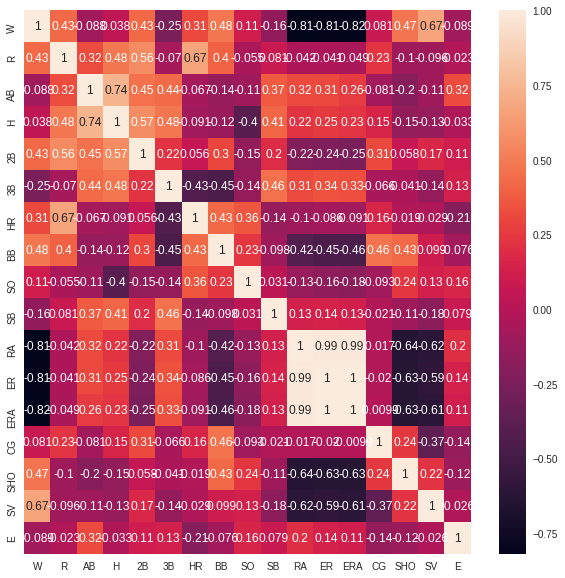

In [7]:
#cheking correlation of the data
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

In [8]:
#dropping highly correlated values from the dataset
data = data.drop(["ERA", "ER"], axis = 1)

# Outliers

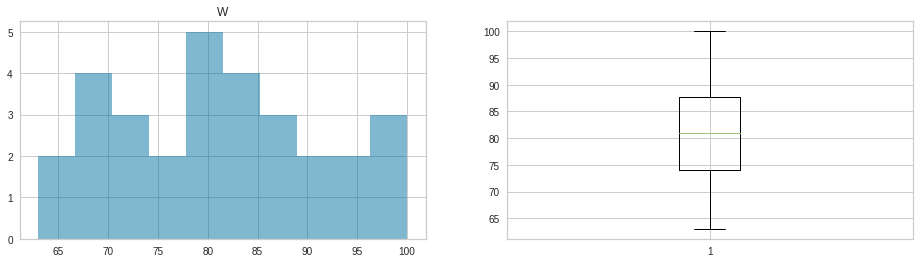

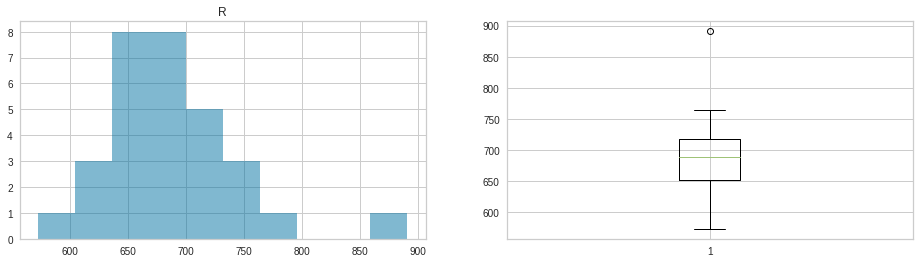

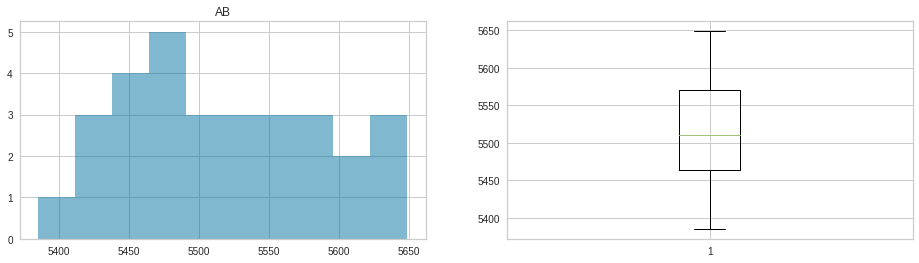

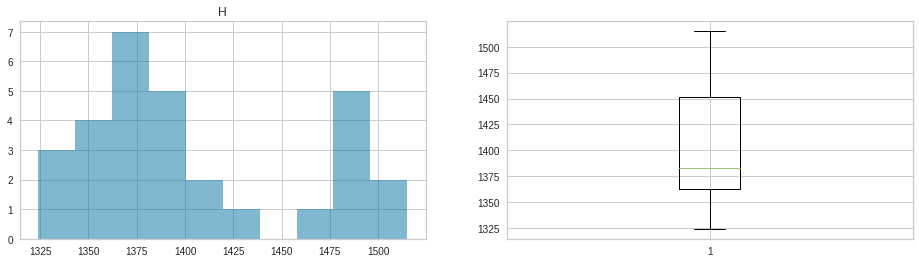

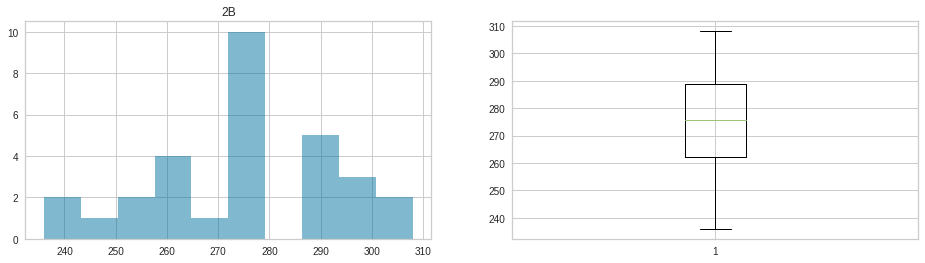

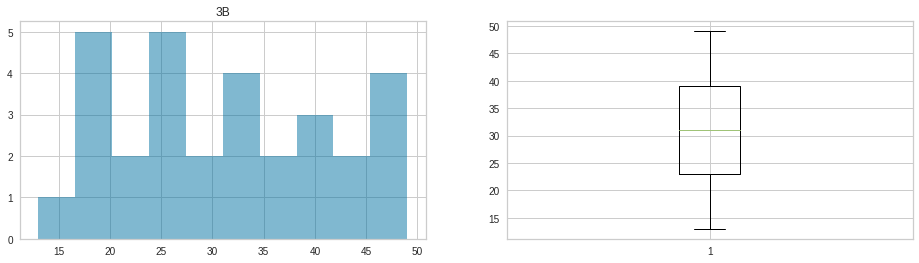

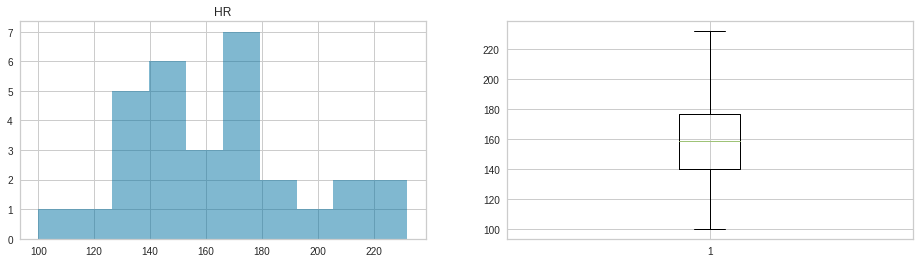

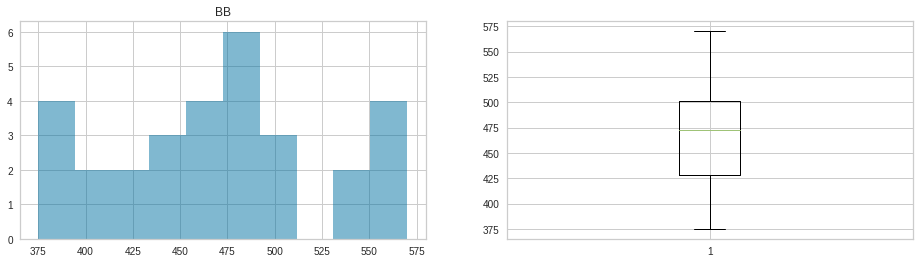

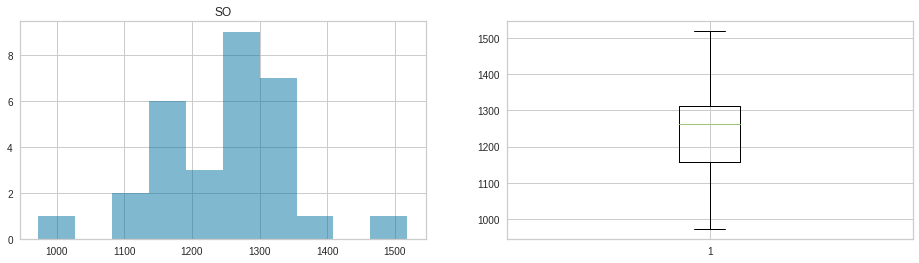

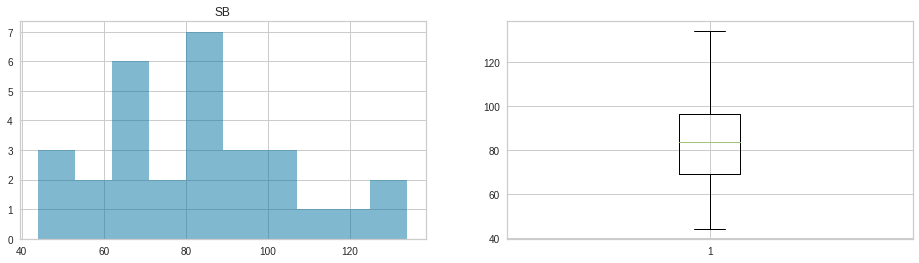

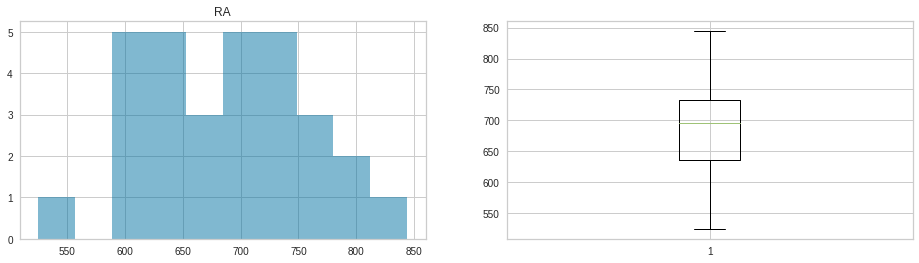

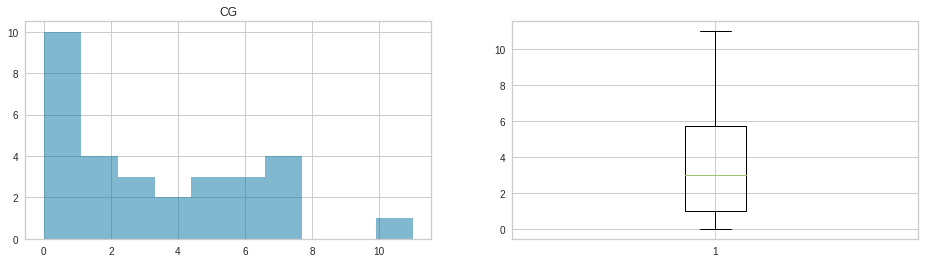

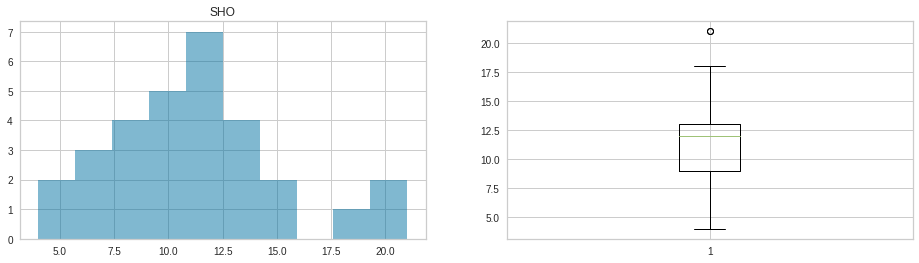

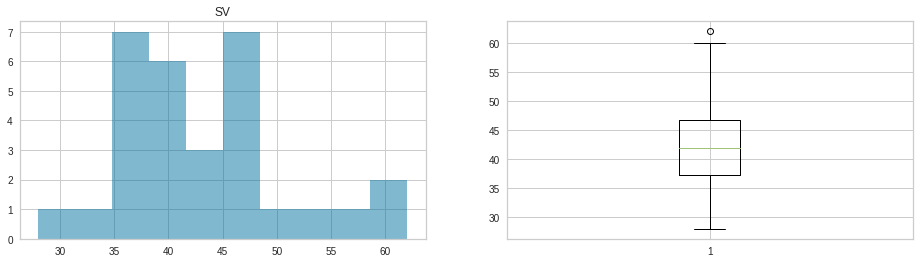

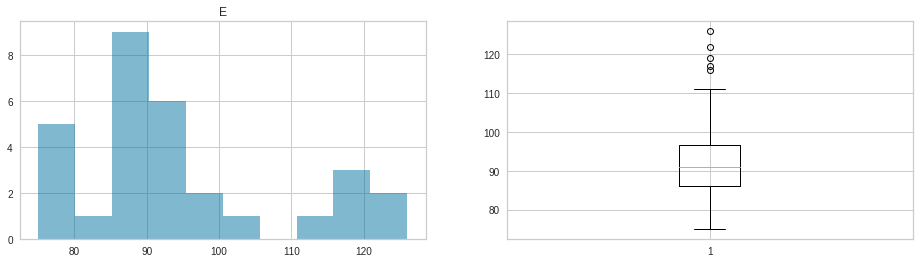

In [9]:
#plotting boxplot
#lets create a function that deals with checking outliers
def plotingvariables(df, column):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(df[column], alpha = 0.5)
    plt.title(column)

    plt.subplot(1,2,2)
    plt.boxplot(df[column])
    plt.show()

for i in data:
    plotingvariables(data, i)

In [10]:
#we are going to apply Robust scalar on data to reduce the Outliers from the data

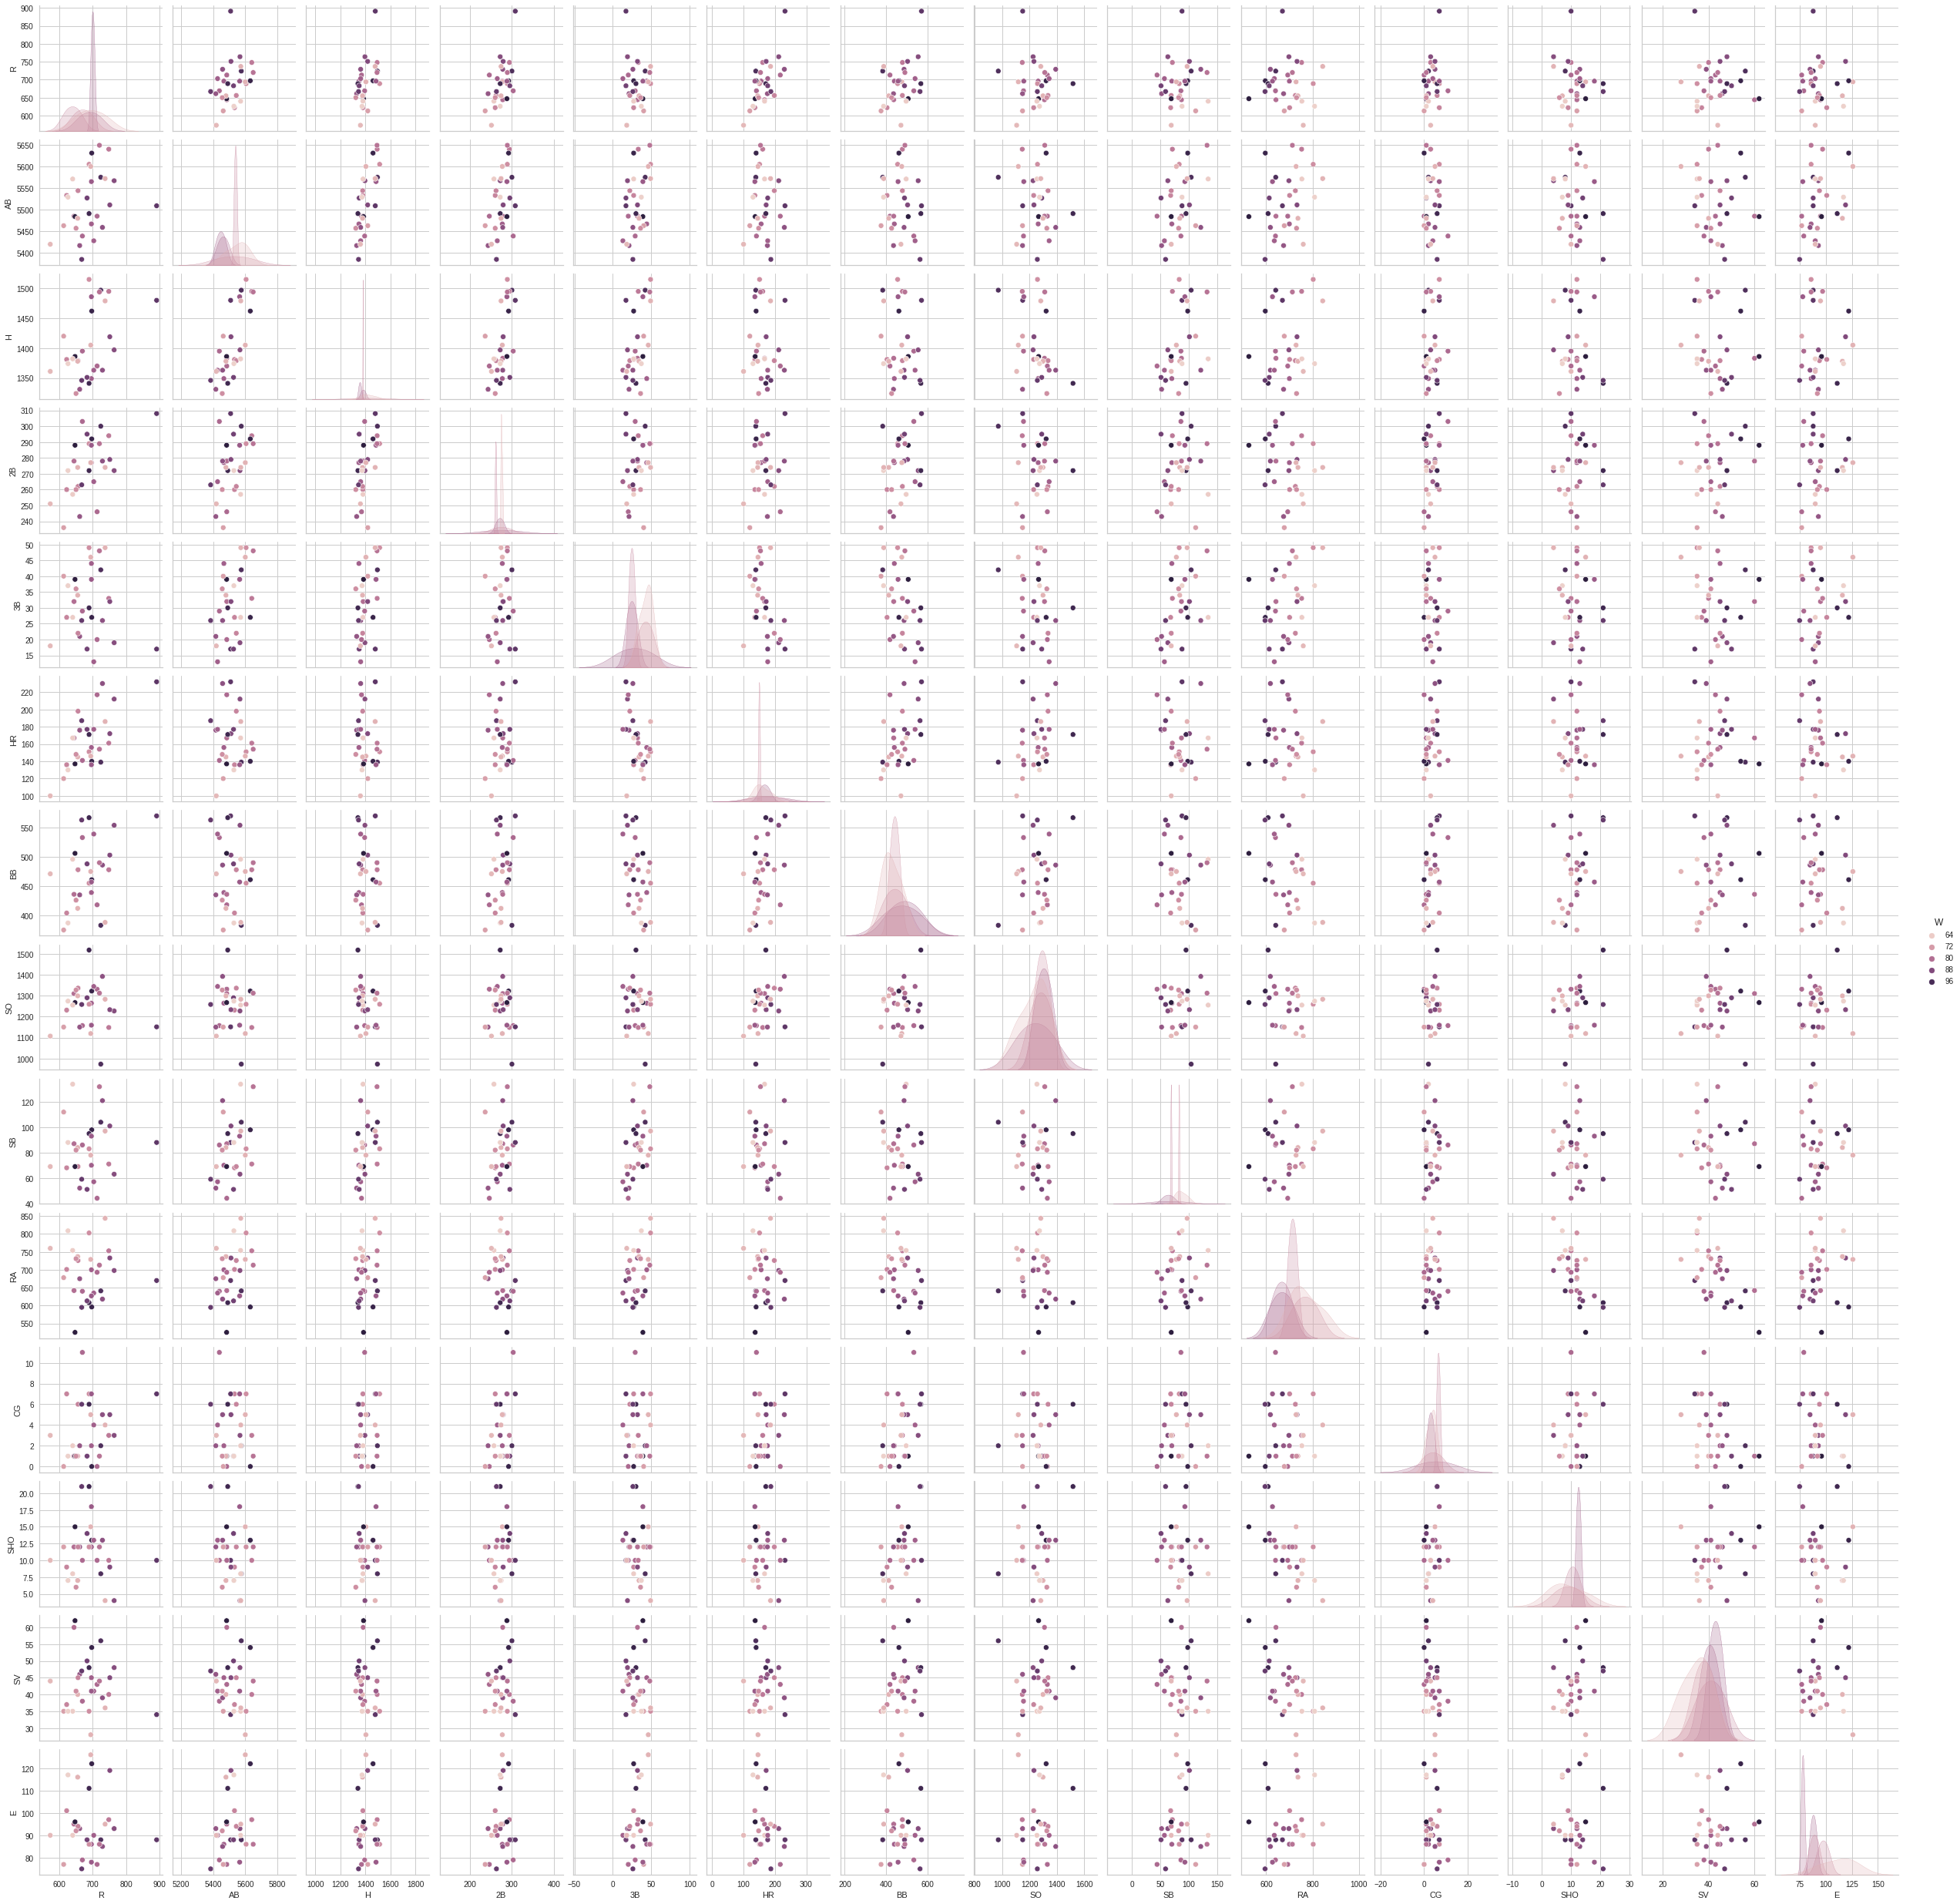

In [11]:
sns.pairplot(data, hue="W")

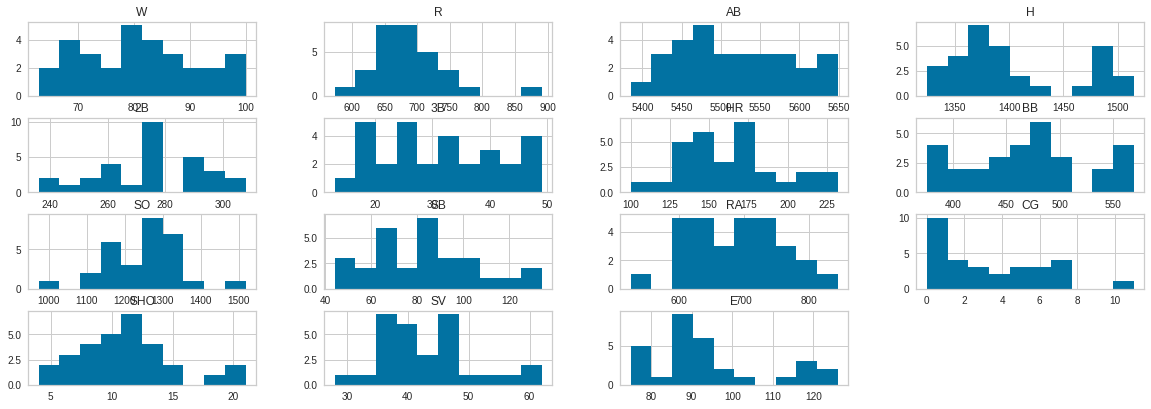

In [12]:
#lets check the distribution by using hist plot
data.hist(figsize=[20,8])
plt.subplots_adjust(bottom = 0.25)
plt.show()

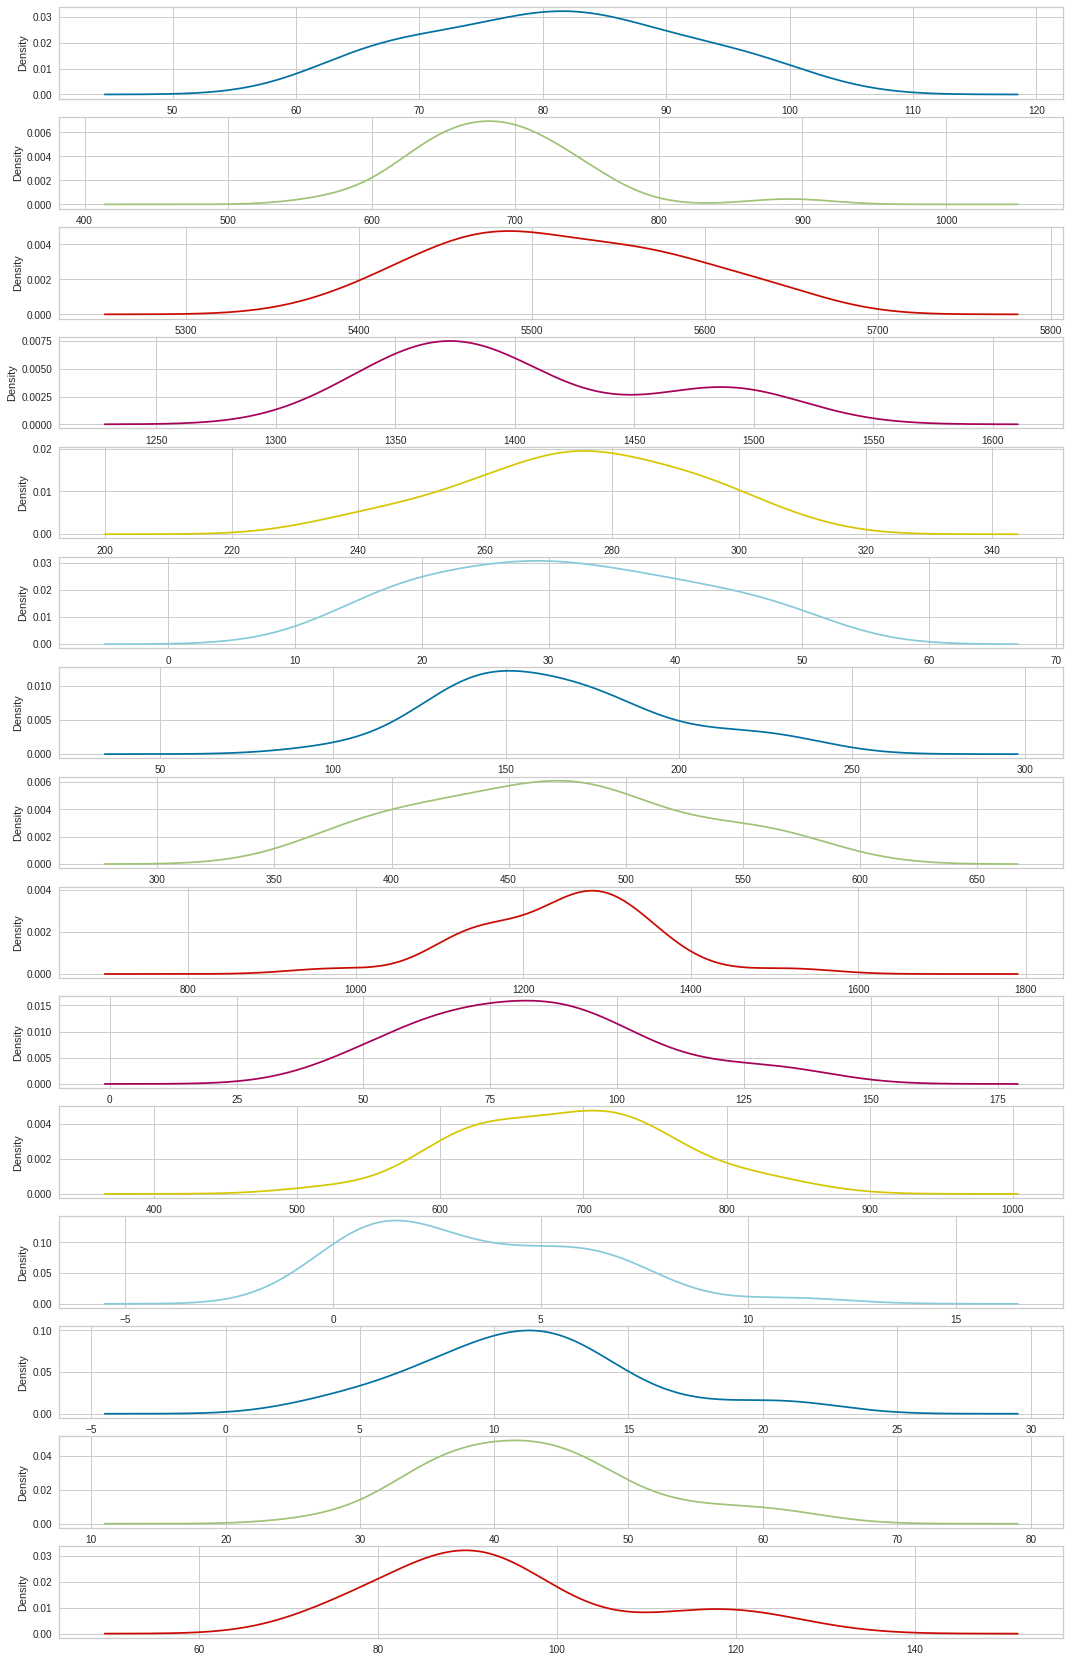

In [13]:
#Plotting the density function
data.plot(kind = 'density', subplots = True, sharex = False, legend = False, figsize = (18,30))
plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W       30 non-null     int64
 1   R       30 non-null     int64
 2   AB      30 non-null     int64
 3   H       30 non-null     int64
 4   2B      30 non-null     int64
 5   3B      30 non-null     int64
 6   HR      30 non-null     int64
 7   BB      30 non-null     int64
 8   SO      30 non-null     int64
 9   SB      30 non-null     int64
 10  RA      30 non-null     int64
 11  CG      30 non-null     int64
 12  SHO     30 non-null     int64
 13  SV      30 non-null     int64
 14  E       30 non-null     int64
dtypes: int64(15)
memory usage: 3.6 KB


# Divding dependent and independent variables

In [15]:
#At first lets divide the dependent and independent variables
x = data.drop(["W"], axis = 1)
y = data["W"]
print(x.shape, y.shape)

(30, 14) (30,)


In [16]:
#creating columns for numerical data
num_cols = [col for col in x if x[col].dtypes != 'object']
num_cols

['R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'CG',
 'SHO',
 'SV',
 'E']

### Feature scaling

In [17]:
#using Robustscalar to remove outliers and adjusting data
scalar = RobustScaler()
mine = pd.DataFrame(scalar.fit_transform(x), columns=x.columns)
x = mine

In [18]:
#we had applied power transform to transform skewed data into standardized data
power = pd.DataFrame(power_transform(x, method = 'yeo-johnson'), columns=x.columns)
x = power

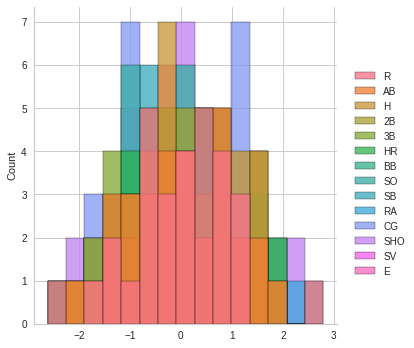

In [19]:
sns.displot(x)

In [20]:
#Now lets create a pipeline to apply PCA, and the steps are
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Regressor

In [21]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rn = RandomForestRegressor()

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.3,random_state=0)

In [23]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_regressor',LinearRegression())])

In [24]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_regressor',DecisionTreeRegressor())])

In [25]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_regressor',RandomForestRegressor())])

In [26]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [27]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [28]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'LinearRegression', 1: 'DecisionTreeRegressor', 2: 'RandomForestRegressor'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(x_train, y_train)

LinearRegression has accuracy of 0.6404749513644084
r2 score of is 0.6404749513644084
Mean squared error is 29.596457090149695
Root mean squared error is 5.4402625938597575
Mean absolute error is 4.829646009279189


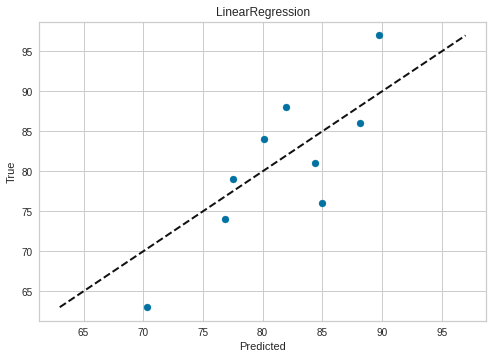

---------------------------------------------------------------------------
DecisionTreeRegressor has accuracy of -0.1418716256748649
r2 score of is -0.1418716256748649
Mean squared error is 94.0
Root mean squared error is 9.695359714832659
Mean absolute error is 7.777777777777778


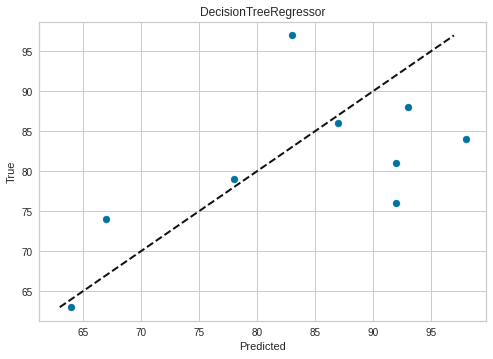

---------------------------------------------------------------------------
RandomForestRegressor has accuracy of 0.5211429064187163
r2 score of is 0.5211429064187163
Mean squared error is 39.41998888888888
Root mean squared error is 6.2785339760878
Mean absolute error is 4.79


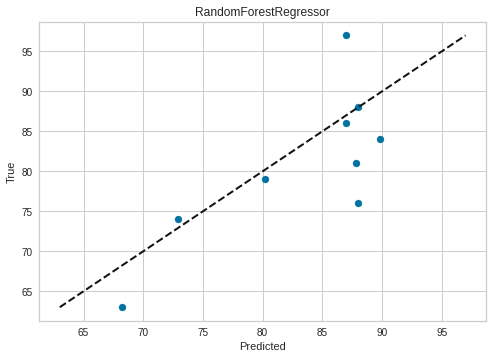

---------------------------------------------------------------------------


In [29]:
#creating a loop for model prediction
for i, model in enumerate(pipelines):
    print("{} has accuracy of {}".format(pipe_dict[i], model.score(x_test,y_test)))
    prediction = model.predict(x_test)
    print("r2 score of is {}".format(r2_score(y_test, prediction)))
    print("Mean squared error is {}".format(mean_squared_error(y_test, prediction)))
    print("Root mean squared error is {}".format(sqrt(mean_squared_error(y_test, prediction))))
    print("Mean absolute error is {}".format(mean_absolute_error(y_test, prediction)))
    plt.scatter(prediction,y_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.title(pipe_dict[i])
    plt.show()
    print('-'*75)
    

In [30]:
#finding best regressor
for i,model in enumerate(pipelines):
    if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Regressor with best accuracy:{}'.format(pipe_dict[best_classifier]))

Regressor with best accuracy:LinearRegression


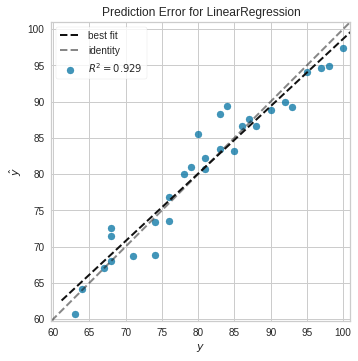

In [31]:
#A prediction error plot shows us where rgression is making more errors
from yellowbrick.regressor import prediction_error

visualize = prediction_error(LinearRegression(),x, y)

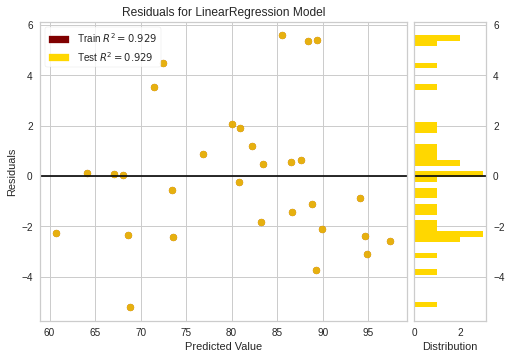

In [40]:
#we will check the distribution of residual plots, thats show difference of residuals in train and test data
from yellowbrick.regressor import residuals_plot

visualizer = residuals_plot(LinearRegression(), x, y, train_color="maroon", test_color="gold")

# Saving the model

In [35]:
import joblib
joblib.dump(lr, "Linear_model.obj")

['Linear_model.obj']

In [37]:
model1 = joblib.load("Linear_model.obj")

# Conclusion

In [38]:
#lets test this model on test data
#creating submission data
a = np.array(y_test)
model1.fit(x_train, y_train)
predicted = np.array(model1.predict(x_test))
submission = pd.DataFrame({'original' : a, 'predicted': predicted})

In [39]:
submission

,original,predicted
0,81,86.806904
1,74,70.999932
2,76,77.164613
3,88,83.417897
4,84,96.506093
5,63,57.042877
6,79,82.730423
7,86,87.641407
8,97,93.442492


In [ ]:
#by this dataset we can clearly say that,

#                       Small Data Is Just Another Challenge That You Can Overcome!